# Vehicle Insurance Claims Prediction
Task to predict the conditions and insurance claims amount based on image and other metadata. <br>
Based on dataset from <a href="https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-vehicle-insurance-claim/">HackerEarth Fast, Furious and Insured: HackerEarth Machine Learning Challenge</a>.

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import cv2
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
%cd './drive/My Drive/'

/content/drive/My Drive


## EDA

In [3]:
train = pd.read_csv('./dataset/train.csv')
test = pd.read_csv('./dataset/test.csv')

In [4]:
train.T

,0,1,2,3,4,5,6,7,8,9,...,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398
Image_path,img_4513976.jpg,img_7764995.jpg,img_451308.jpg,img_7768372.jpg,img_7765274.jpg,img_4537770.jpg,img_7765649.jpg,img_4518199.jpg,img_7767281.jpg,img_4638641.jpg,...,img_4635689.jpg,img_4514832.jpg,img_4518854.jpg,img_4638768.jpg,img_4535755.jpg,img_4637237.jpg,img_4637000.jpg,img_4637503.jpg,img_4515101.jpg,img_4636333.jpg
Insurance_company,BQ,BQ,A,A,AC,AC,AC,BC,DA,BB,...,RE,AA,RE,AC,AC,DA,BQ,AA,A,B
Cost_of_vehicle,41500,50700,49500,33500,27600,50700,53200,35700,NaN,48200,...,34900,27100,45200,26100,51500,52300,41500,31400,33200,NaN
Min_coverage,1037.5,1267.5,1237.5,837.5,690,1267.5,1330,892.5,NaN,1205,...,872.5,677.5,1130,652.5,1287.5,1307.5,1037.5,785,830,NaN
Expiry_date,2026-12-03,2025-07-10,2022-08-11,2022-08-02,2026-05-01,2026-08-07,2028-01-12,2027-11-16,2028-06-07,2024-09-04,...,2025-10-16,2022-11-01,2025-06-07,2028-01-06,2022-01-07,2025-02-17,2023-12-30,2022-11-25,2022-10-10,2024-10-30
Max_coverage,36142.7,12753,43102.7,8453,6978,12753,13378,9003,NaN,12128,...,8803,6853,11378,6603,12953,13153,10453,7928,8378,NaN
Condition,0,1,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Amount,0,6194,0,7699,8849,253,4013,2228,513,6384,...,4906,3070,7440,621,4058,4565,3363,5336,8734,NaN


In [5]:
test.T

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
Image_path,img_4538519.jpg,img_7766002.jpg,img_4637390.jpg,img_4516108.jpg,img_4517008.jpg,img_7766273.jpg,img_4638351.jpg,img_4635542.jpg,img_4638631.jpg,img_7767742.jpg,...,img_7764741.jpg,img_4514813.jpg,img_4536061.jpg,img_4535346.jpg,img_4635252.jpg,img_7766518.jpg,img_4535713.jpg,img_4511787.jpg,img_4517592.jpg,img_4635378.jpg
Insurance_company,B,C,AC,BB,BB,BB,B,BB,RE,BC,...,BQ,RE,AA,AC,DA,B,O,BQ,AA,RE
Cost_of_vehicle,23600,28300,43700,46100,40700,30500,41400,41100,24900,48300,...,39200,38600,33900,52000,50100,30900,51300,27000,42600,49300
Min_coverage,590,707.5,1092.5,1152.5,1017.5,762.5,1035,1027.5,622.5,1207.5,...,980,965,847.5,1300,1252.5,772.5,1282.5,675,1065,1232.5
Expiry_date,2025-04-12,2028-08-24,2023-11-28,2028-02-04,2022-01-03,2028-03-28,2022-06-02,2027-05-31,2022-03-15,2026-05-19,...,2025-10-10,2028-10-28,2027-06-15,2025-04-01,2027-05-27,2024-10-23,2025-02-21,2023-07-13,2024-05-05,2025-08-07
Max_coverage,5978,7153,11003,11603,10253,7703,10428,10353,6303,12153,...,9878,9728,8553,13078,12603,7803,12903,23527.7,10728,12403


In [6]:
combined = pd.concat([train[['Image_path','Insurance_company','Cost_of_vehicle','Min_coverage','Expiry_date','Max_coverage']],test])

In [7]:
train.isna().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [8]:
test.isna().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
dtype: int64

Dropping NA values for amount, since it is a label.

In [9]:
train = train[~train.Amount.isna()]

In [10]:
train.shape

(1388, 8)

In [11]:
train.dtypes

Image_path            object
Insurance_company     object
Cost_of_vehicle      float64
Min_coverage         float64
Expiry_date           object
Max_coverage         float64
Condition              int64
Amount               float64
dtype: object

### Categorizing

In [12]:
le_insurance = LabelEncoder()
combined['Insurance_company'] = le_insurance.fit_transform(combined['Insurance_company'])
train['Insurance_company'] = le_insurance.transform(train['Insurance_company'])
test['Insurance_company'] = le_insurance.transform(test['Insurance_company'])

In [13]:
train.describe()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
count,1388.000000,1301.000000,1301.000000,1301.000000,1388.000000,1388.000000
mean,4.954611,37472.328978,936.808224,11259.900046,0.928674,4117.144092
std,3.141478,8918.789321,222.969733,7183.175604,0.257461,3151.516223
min,0.000000,11100.000000,277.500000,2853.000000,0.000000,-999.000000
25%,2.000000,29800.000000,745.000000,7603.000000,1.000000,1641.750000
50%,5.000000,37300.000000,932.500000,9678.000000,1.000000,4070.000000
75%,8.000000,45200.000000,1130.000000,11703.000000,1.000000,6039.500000
max,10.000000,53500.000000,1337.500000,46495.680000,1.000000,59844.000000


In [14]:
combined.describe()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage
count,1999.000000,1910.000000,1910.000000,1910.000000
mean,4.909955,37680.837696,942.020942,11254.939016
std,3.150845,9007.881383,225.197035,7051.051150
min,0.000000,11100.000000,277.500000,2853.000000
25%,2.000000,30100.000000,752.500000,7703.000000
50%,5.000000,37350.000000,933.750000,9678.000000
75%,8.000000,45400.000000,1135.000000,11796.750000
max,10.000000,79200.000000,1980.000000,46495.680000


### Outlier Removal

-ve Amount??

In [15]:
(train.Amount<0).sum()

1

In [16]:
train[train.Amount<0]

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
641,img_7766741.jpg,9,NaN,NaN,2028-01-31,NaN,1,-999.0


In [17]:
train = train[train.Amount>=0]
train.shape

(1387, 8)

### Measuring Correlation and Redundant Features

In [18]:
corr = train.corr()
corr.style.background_gradient(cmap='PiYG')

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
Insurance_company,1.000000,0.001659,0.001659,-0.028255,0.026061,-0.022040
Cost_of_vehicle,0.001659,1.000000,1.000000,0.419384,-0.058286,-0.020802
Min_coverage,0.001659,1.000000,1.000000,0.419384,-0.058286,-0.020802
Max_coverage,-0.028255,0.419384,0.419384,1.000000,-0.908054,-0.330780
Condition,0.026061,-0.058286,-0.058286,-0.908054,1.000000,0.362859
Amount,-0.022040,-0.020802,-0.020802,-0.330780,0.362859,1.000000


Condition label is solely dependent on the vehicle image.<br>
But, amount label is dependent on the other dataframe fields, given that condition is 1 else amout is 0 i.e. not damaged. So clearing the no-damage rows for further inspection of the damaged rows.

In [19]:
train1 = train[train.Condition==1]
train1 = train1.drop(columns='Condition')
train1.T

,1,3,4,5,6,7,8,9,10,11,...,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397
Image_path,img_7764995.jpg,img_7768372.jpg,img_7765274.jpg,img_4537770.jpg,img_7765649.jpg,img_4518199.jpg,img_7767281.jpg,img_4638641.jpg,img_4516058.jpg,img_4518648.jpg,...,img_4636459.jpg,img_4635689.jpg,img_4514832.jpg,img_4518854.jpg,img_4638768.jpg,img_4535755.jpg,img_4637237.jpg,img_4637000.jpg,img_4637503.jpg,img_4515101.jpg
Insurance_company,6,0,2,2,2,5,8,4,8,7,...,5,10,1,10,2,2,8,6,1,0
Cost_of_vehicle,50700,33500,27600,50700,53200,35700,NaN,48200,23100,30100,...,31500,34900,27100,45200,26100,51500,52300,41500,31400,33200
Min_coverage,1267.5,837.5,690,1267.5,1330,892.5,NaN,1205,577.5,752.5,...,787.5,872.5,677.5,1130,652.5,1287.5,1307.5,1037.5,785,830
Expiry_date,2025-07-10,2022-08-02,2026-05-01,2026-08-07,2028-01-12,2027-11-16,2028-06-07,2024-09-04,2023-06-08,2026-09-20,...,2023-03-09,2025-10-16,2022-11-01,2025-06-07,2028-01-06,2022-01-07,2025-02-17,2023-12-30,2022-11-25,2022-10-10
Max_coverage,12753,8453,6978,12753,13378,9003,NaN,12128,5853,7603,...,7953,8803,6853,11378,6603,12953,13153,10453,7928,8378
Amount,6194,7699,8849,253,4013,2228,513,6384,9634,2435,...,487,4906,3070,7440,621,4058,4565,3363,5336,8734


In [20]:
corr = train1.corr()
corr.style.background_gradient(cmap='PiYG')

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Amount
Insurance_company,1.000000,0.001782,0.001782,0.001782,-0.035034
Cost_of_vehicle,0.001782,1.000000,1.000000,1.000000,0.000490
Min_coverage,0.001782,1.000000,1.000000,1.000000,0.000490
Max_coverage,0.001782,1.000000,1.000000,1.000000,0.000490
Amount,-0.035034,0.000490,0.000490,0.000490,1.000000


In [21]:
corr = combined.corr()
corr.style.background_gradient(cmap='PiYG')

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage
Insurance_company,1.000000,0.009804,0.009804,0.002275
Cost_of_vehicle,0.009804,1.000000,1.000000,0.414157
Min_coverage,0.009804,1.000000,1.000000,0.414157
Max_coverage,0.002275,0.414157,0.414157,1.000000


Max_coverage correlation doesn't seem to be present in the testing distribution. Hence, finding the deviants in the testing set.

In [22]:
mean_val = np.around((train1.Max_coverage/train1.Cost_of_vehicle).mean(),decimals=2)
mean_val

0.25

In [23]:
test_df_corr = np.around((test.Max_coverage/test.Cost_of_vehicle),decimals=2)
(test_df_corr==mean_val).sum()

558

The difference in corr could be due to the removed column of `Condition`. Most probably a data leakage, where correlations of Damaged and Non-Damaged conditions are different.

In [24]:
train0 = train[train.Condition==0]
train0 = train0.drop(columns='Condition')

In [25]:
mean_val = np.around((train0.Max_coverage/train0.Cost_of_vehicle).mean(),decimals=2)
mean_val

0.87

In [26]:
test_df_corr = np.around((test.Max_coverage/test.Cost_of_vehicle),decimals=2)
(test_df_corr==mean_val).sum()

42

Comparing the distribution between `Condition` of 0 and 1, just to be sure!!

In [27]:
print(len(train1)/len(train0),558/42)

13.01010101010101 13.285714285714286


Approx. same, so it could be assumed that the `Condition` columns is sorted!!<br> `Amount` lefts to be seen.

In [28]:
mean_val = np.around((train1.Max_coverage/train1.Cost_of_vehicle).mean(),decimals=2)
test['Condition'] = (test_df_corr==mean_val).astype(int)
test1 = test[test.Condition==1]
test1 = test1.drop(columns='Condition')
combined1 = pd.concat([train1[['Image_path','Insurance_company','Cost_of_vehicle','Min_coverage','Expiry_date','Max_coverage']],test1])

In [29]:
test0 = test[test.Condition==0]
test0 = test0.drop(columns='Condition')

In [30]:
corr = combined1.corr()
corr.style.background_gradient(cmap='PiYG')

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage
Insurance_company,1.000000,0.009028,0.009028,0.009028
Cost_of_vehicle,0.009028,1.000000,1.000000,1.000000
Min_coverage,0.009028,1.000000,1.000000,1.000000
Max_coverage,0.009028,1.000000,1.000000,1.000000


Hence, keeping only `Cost_of_vehicle`, since rest perfectly correlate.

In [31]:
train1 = train1.drop(columns=['Min_coverage','Max_coverage'])
combined1 = combined1.drop(columns=['Min_coverage','Max_coverage'])

<AxesSubplot:ylabel='Density'>

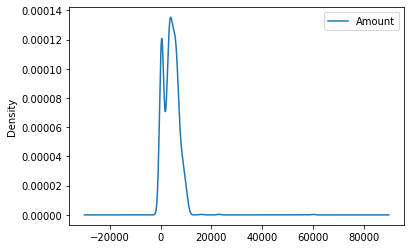

In [32]:
train.plot(y='Amount',kind='kde')

<AxesSubplot:ylabel='Density'>

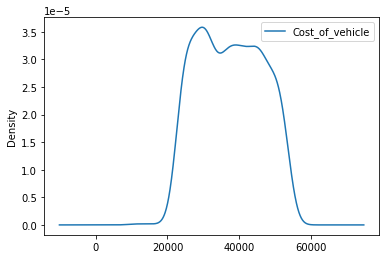

In [33]:
train.plot(y='Cost_of_vehicle',kind='kde')

<AxesSubplot:>

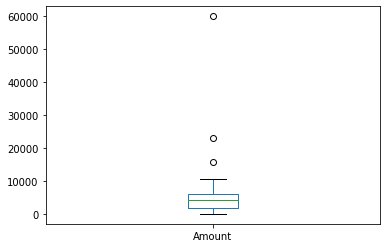

In [34]:
%matplotlib inline 
#qt
train.plot(y='Amount',kind='box')

Eliminating outliers i.e >1.26e+4

In [35]:
(train.Amount>1.26e+04).sum()

3

In [36]:
train = train[train.Amount<=1.26e+04]
train.shape

(1384, 8)

<AxesSubplot:xlabel='Expiry_date', ylabel='Amount'>

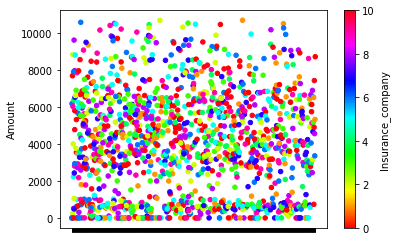

In [37]:
train.plot(x='Expiry_date',y='Amount',c='Insurance_company',kind='scatter',cmap='hsv')

<AxesSubplot:xlabel='Cost_of_vehicle', ylabel='Amount'>

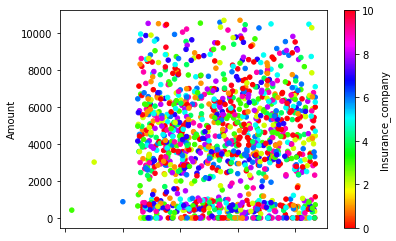

In [38]:
train.plot(x='Cost_of_vehicle',y='Amount',c='Insurance_company',kind='scatter',cmap='hsv')

In [39]:
print(min(combined.Expiry_date),max(combined.Expiry_date))

2021-11-04 2028-12-29


In [40]:
# DataFrame for usage in the Convolution Network Training
conv_df = {'Image_paths':[],'condition':[]}
for _, rows in train.iterrows():
    conv_df['Image_paths'].append(rows.Image_path)
    conv_df['condition'].append(rows.Condition)

for _, rows in test.iterrows():
    conv_df['Image_paths'].append(rows.Image_path)
    conv_df['condition'].append(rows.Condition)

conv_df = pd.DataFrame(conv_df)
conv_df.head()

,Image_paths,condition
0,img_4513976.jpg,0
1,img_7764995.jpg,1
2,img_451308.jpg,0
3,img_7768372.jpg,1
4,img_7765274.jpg,1


## EDA - Images
Combined folder, consisting of both train and test images exists.

In [42]:
root = './dataset/combined'
height, width = 0, 0
for f in os.listdir(root):
    if os.path.isdir(os.path.join(root,f)):
        continue
    img = Image.open(os.path.join(root,f))
    w, h = img.size
    width+=w
    height+=h
width/=len(os.listdir(root))
height/=len(os.listdir(root))
print(width, height)

599.5545 396.6365


In [45]:
combined_imgs = []
for f in os.listdir(root):
    if os.path.isdir(os.path.join(root,f)):
        continue
    img = Image.open(os.path.join(root,f))
    combined_imgs.append(np.array(img.resize((599,396))))
combined_imgs = np.asarray(combined_imgs)
combined_imgs.shape

(1999, 396, 599, 3)

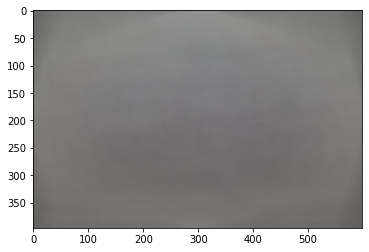

In [46]:
combined_map = combined_imgs.mean(axis=0).astype(np.uint8)
plt.imshow(combined_map)

In [47]:
del combined_imgs

In [48]:
combined_map.shape

(396, 599, 3)

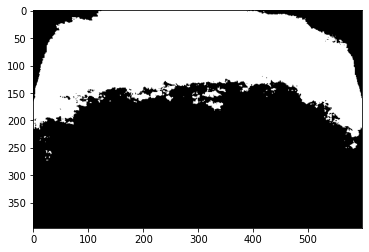

In [49]:
img1 = combined_map[:,:,0]
_, thresh1 = cv2.threshold(img1, 125, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

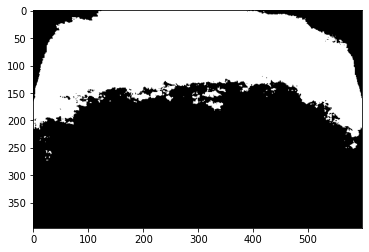

In [50]:
img2 = combined_map[:,:,1]
_, thresh2 = cv2.threshold(img2, 125, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

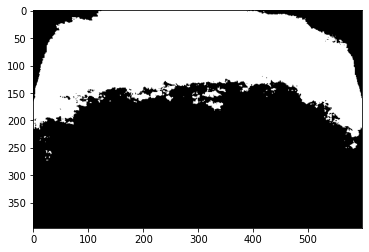

In [51]:
img3 = combined_map[:,:,2]
_, thresh3 = cv2.threshold(img3, 125, 255, cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')

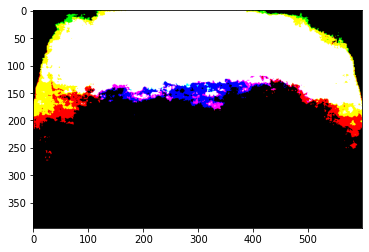

In [52]:
plt.imshow(np.dstack((thresh1,thresh2,thresh3)))

## Conv Training
Creating a model that can simulate the trends in the `Amount`, solely from the images. This can further be used as an additional metric alongside the remaining. In effect, model stacking.

In [46]:
# Utilizing Fastai for the ConvNet implementation -> Using a Pretrained ResNet34
from fastai.vision import *
from fastai.metrics import error_rate
from torch import nn

In [47]:
# Normalizing Amount
train_conv = train1[['Image_path','Amount']]
amt = np.asarray(train_conv.Amount.values)
amt = (amt - amt.min())/(amt.max() - amt.min())
train_conv.Amount = amt
train_conv.head()

,Image_path,Amount
1,img_7764995.jpg,0.102393
3,img_7768372.jpg,0.127572
4,img_7765274.jpg,0.146813
5,img_4537770.jpg,0.002995
6,img_7765649.jpg,0.065903


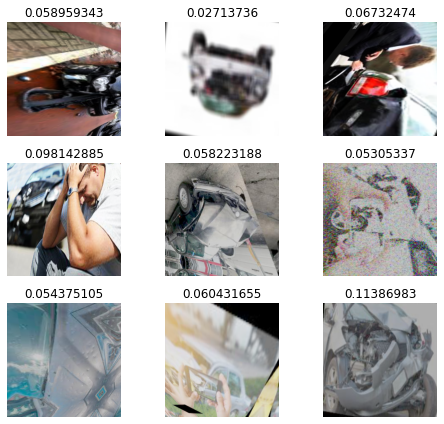

In [48]:
tfms = get_transforms(do_flip=True  # random flip with prob 0.5
                        , flip_vert=True # flip verticle or rotated by 90
                        , max_rotate=3 # rotation with prob p_affine
                        , max_zoom=1.2  # zoom between 1 and value
                        , max_lighting=0.4  # lighting and contrast
                        , max_warp=0.5 # symmetric wrap with prob p_affine
                        , p_affine=0.5  # prob 
                        , p_lighting=0.3 # prob of lighting
                      )

# DataBunch API with continuous values as labels, using label_cls=FloatList
data = (ImageList
        .from_df(path='./dataset/combined',df=train_conv)
        .split_by_rand_pct(0.2)
        .label_from_df(cols='Amount',label_cls=FloatList)
        .transform(tfms, size=(256,256))
        .databunch()
        .normalize(imagenet_stats))
data.show_batch(rows=3, figsize=(7,6))

In [49]:
# Creating a ConvNet Regression learner based on ResNet34 backbone
model = models.resnet34
learn = create_cnn(data, model, metrics=error_rate)

learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-02
Min loss divided by 10: 4.79E-03


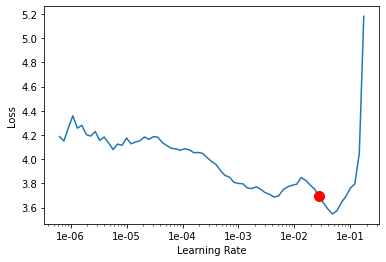

In [47]:
# learning rate finder
learn.freeze()
learn.lr_find()

# plot the lr_find to get better learning rate
# learning rate vs loss
learn.recorder.plot(suggestion=True)

In [48]:
# 5 epochs with freeze
learn.freeze()
learn.fit_one_cycle(5, max_lr=slice(5e-2))

epoch,train_loss,valid_loss,error_rate,time
0,4.275632,8.793629,0.996109,00:48
1,2.626496,0.613470,0.996109,00:23
2,1.773105,0.221720,0.996109,00:23
3,1.184423,0.062782,0.996109,00:23
4,0.821421,0.035588,0.996109,00:22


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-03
Min loss divided by 10: 1.91E-03


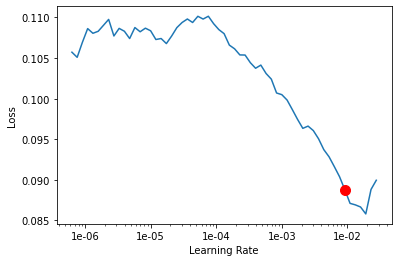

In [49]:
# learning rate finder
learn.unfreeze()
learn.lr_find()

# plot the lr_find to get better learning rate
# learning rate vs loss
learn.recorder.plot(suggestion=True)

In [50]:
# 20 epochs with un-freeze
learn.unfreeze()
learn.fit_one_cycle(20, max_lr=slice(1e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.112434,0.026180,0.996109,00:23
1,0.099225,0.021664,0.996109,00:23
2,0.092282,0.025871,0.996109,00:23
3,0.081361,0.012466,0.996109,00:24
4,0.068978,0.007668,0.996109,00:23
5,0.057813,0.005779,0.996109,00:24
6,0.047311,0.003959,0.996109,00:23
7,0.038432,0.003731,0.996109,00:24
8,0.031090,0.002675,0.996109,00:24
9,0.024917,0.004463,0.996109,00:24


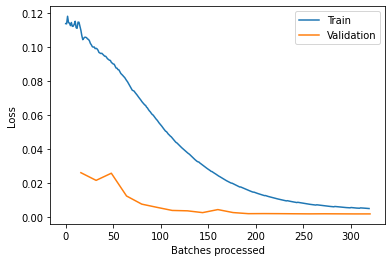

In [51]:
learn.recorder.plot_losses()

In [52]:
learn.save('resnet34_pass2_ver2')

In [50]:
# Uncomment for reuse without training
#learn.load('resnet34_pass2_ver2')

Learner(data=ImageDataBunch;

Train: LabelList (1031 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: FloatList
0.12757236,0.14681278,0.06590263,0.036038145,0.007344822
Path: dataset/combined;

Valid: LabelList (257 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: FloatList
0.04336624,0.060632423,0.07346495,0.12916179,0.05260164
Path: dataset/combined;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchN

In [51]:
# Predicted Value -> to be used as an additional feature
predicted_val = {'Image_path':[],'AmtPred':[]}
for f in os.listdir('./dataset/combined'):
  path = os.path.join('./dataset/combined',f)
  if os.path.isdir(path):
    continue
  cat, _, _ = learn.predict(open_image(path))
  predicted_val['Image_path'].append(f)
  predicted_val['AmtPred'].append(cat.data[0])
predicted_val = pd.DataFrame(predicted_val)

In [52]:
predicted_val.head()

,Image_path,AmtPred
0,img_7765429.jpg,0.092970
1,img_4637608.jpg,0.078033
2,img_4517377.jpg,0.099121
3,img_4634701.jpg,0.073188
4,img_4537534.jpg,0.109297


## Final Model Training
Utilizing the predicted amount from convolution learner as an additional feature.

In [ ]:
from datetime import datetime
import pydot
from PIL import Image

from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz

In [53]:
# Selecting the required features, and labels and adding the Predicted Amount feature
train_df = train1[['Image_path','Insurance_company','Cost_of_vehicle','Expiry_date']]
img = train_df.Image_path.values
amt = []
for _,row in predicted_val.iterrows():
  if row.Image_path in img:
    amt.append(row.AmtPred)
train_df['AmtPred'] = amt
train_df['Amount'] = train1['Amount']

In [54]:
# Converting from datetime object to ordinal representation
train_df['Expiry_date'] = train_df['Expiry_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').toordinal())

In [55]:
train_df.pop('Image_path')

1       img_7764995.jpg
3       img_7768372.jpg
4       img_7765274.jpg
5       img_4537770.jpg
6       img_7765649.jpg
             ...       
1393    img_4535755.jpg
1394    img_4637237.jpg
1395    img_4637000.jpg
1396    img_4637503.jpg
1397    img_4515101.jpg
Name: Image_path, Length: 1288, dtype: object

In [56]:
train_df.head()

,Insurance_company,Cost_of_vehicle,Expiry_date,AmtPred,Amount
1,6,50700.0,739442,0.092970,6194.0
3,0,33500.0,738369,0.078033,7699.0
4,2,27600.0,739737,0.099121,8849.0
5,2,50700.0,739835,0.109297,253.0
6,2,53200.0,740358,0.079787,4013.0


Imputing missing values.

In [58]:
imputer = KNNImputer(n_neighbors=4)

In [59]:
train_df = imputer.fit_transform(train_df)

In [60]:
train_df

array([[6.000000e+00, 5.070000e+04, 7.394420e+05, 9.296972e-02, 6.194000e+03],
       [0.000000e+00, 3.350000e+04, 7.383690e+05, 7.803272e-02, 7.699000e+03],
       [2.000000e+00, 2.760000e+04, 7.397370e+05, 9.912114e-02, 8.849000e+03],
       [2.000000e+00, 5.070000e+04, 7.398350e+05, 1.092975e-01, 2.530000e+02],
       ...,
       [8.000000e+00, 5.230000e+04, 7.392990e+05, 4.901853e-02, 4.565000e+03],
       [6.000000e+00, 4.150000e+04, 7.388840e+05, 9.861492e-02, 3.363000e+03],
       [1.000000e+00, 3.140000e+04, 7.384840e+05, 5.110251e-02, 5.336000e+03],
       [0.000000e+00, 3.320000e+04, 7.384380e+05, 9.526278e-02, 8.734000e+03]])

Shuffling and splitting into train and validation sets.

In [61]:
np.random.shuffle(train_df)

In [62]:
X = train_df[:,:-1]
y = train_df[:,-1]
len(X)*0.9

1159.2

In [63]:
X_train = X[:1159]
X_val = X[1159:]
y_train = y[:1159]
y_val = y[1159:]

In [64]:
# List of features being used
feature_list = ['Insurance_company','Cost_of_vehicle','Expiry_date','AmtPred']

Sample Random Forest to measure feature importances.

In [65]:
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X, y)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

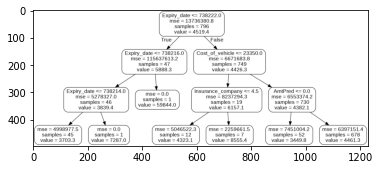

In [66]:
plt.imshow(Image.open('small_tree.png'))

In [67]:
importances = list(rf_small.feature_importances_)# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Expiry_date          Importance: 0.55
Variable: AmtPred              Importance: 0.26
Variable: Cost_of_vehicle      Importance: 0.16
Variable: Insurance_company    Importance: 0.02


Measuring the error in using different amount of features depending on its importance as seen above.

In [68]:
# Random forest with only the two most important variables
rf_most_important1 = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('Expiry_date'), feature_list.index('AmtPred')]
train_important = X_train[:, important_indices]
test_important = X_val[:, important_indices]
rf_most_important1.fit(train_important, y_train)
predictions = rf_most_important1.predict(test_important)
errors = abs(predictions - y_val)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2500.82 degrees.
Accuracy: -51.27 %.


In [69]:
# Random forest with only the three most important variables
rf_most_important2 = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('Expiry_date'), feature_list.index('AmtPred'), feature_list.index('Cost_of_vehicle')]
train_important = X_train[:, important_indices]
test_important = X_val[:, important_indices]
rf_most_important2.fit(train_important, y_train)
predictions = rf_most_important2.predict(test_important)
errors = abs(predictions - y_val)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2441.91 degrees.
Accuracy: -45.56 %.


In [70]:
# Random forest with only the all present variables
rf_most_important3 = RandomForestRegressor(n_estimators= 1000, random_state=42)
rf_most_important3.fit(X_train, y_train)
predictions = rf_most_important3.predict(X_val)
errors = abs(predictions - y_val)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 2524.14 degrees.
Accuracy: -63.36 %.


Using only the 2 most important variables, since it has the lowest MAE.

In [71]:
import pickle

filehandler = open(b"./dataset/combined/models/RandomForestRegressor.pickle","wb")
pickle.dump(rf_most_important1, filehandler)

## Test Submission

In [72]:
test_df = test1[['Image_path','Expiry_date']]
img = test_df.Image_path.values
amt = []
for _,row in predicted_val.iterrows():
  if row.Image_path in img:
    amt.append(row.AmtPred)
test_df['AmtPred'] = amt

In [73]:
from datetime import datetime

test_df['Expiry_date'] = test_df['Expiry_date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').toordinal())

In [74]:
test_df.pop('Image_path')

0      img_4538519.jpg
1      img_7766002.jpg
2      img_4637390.jpg
3      img_4516108.jpg
4      img_4517008.jpg
            ...       
594    img_4635252.jpg
595    img_7766518.jpg
596    img_4535713.jpg
598    img_4517592.jpg
599    img_4635378.jpg
Name: Image_path, Length: 558, dtype: object

In [75]:
test_df.head()

,Expiry_date,AmtPred
0,739353,0.073188
1,740583,0.092588
2,738852,0.083399
3,740381,0.050253
4,738158,0.066965


In [76]:
test_df.values

array([[7.393530e+05, 7.318760e-02],
       [7.405830e+05, 9.258838e-02],
       [7.388520e+05, 8.339934e-02],
       [7.403810e+05, 5.025318e-02],
       ...,
       [7.391820e+05, 8.764656e-02],
       [7.393030e+05, 7.074992e-02],
       [7.390110e+05, 6.956810e-02],
       [7.394700e+05, 1.101872e-01]])

In [77]:
predictions = rf_most_important1.predict(test_df)

In [80]:
predictions = predictions.astype(int)
print(len(predictions))
predictions

558


array([5205, 3544, 2211, 2314, ..., 4582, 3173, 2444, 4315])

In [83]:
print(len(test1))

558


In [85]:
submission = {'Image_path':[],'Condition':[],'Amount':[]}
for _, row in test0.iterrows():
  submission['Image_path'].append(row.Image_path)
  submission['Condition'].append(0)
  submission['Amount'].append(0)

i = 0
for _, row in test1.iterrows():
  submission['Image_path'].append(row.Image_path)
  submission['Condition'].append(1)
  submission['Amount'].append(predictions[i])
  i += 1

submission = pd.DataFrame(submission)
submission.head()

,Image_path,Condition,Amount
0,img_463748.jpg,0,0
1,img_4518771.jpg,0,0
2,img_4538967.jpg,0,0
3,img_4518530.jpg,0,0
4,img_4514068.jpg,0,0


In [86]:
# Final submission file
submission.to_csv('./dataset/submission.csv', index=False)

Gives a final score of 50, from the RandomForest model 3.